In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer


In [2]:
file_path = "office_group.txt"

In [3]:

def parse_whatsapp_chat(file_path):
    """
    Parses a WhatsApp chat history file and returns a pandas DataFrame.

    Args:
        file_path (str): The path to the WhatsApp chat history text file.

    Returns:
        pandas.DataFrame: A DataFrame with columns 'Date', 'Time', 'Sender', and 'Message'.
                          Returns an empty DataFrame if parsing fails.
    """
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    for line in lines:
        line = line.strip()
        # Regex to capture standard messages (with name or phone number)
        standard_pattern = r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}\u202f[APM]{2}) - ([^:]+): (.*)$'
        match_standard = re.match(standard_pattern, line)

        if match_standard:
            date, time, sender, message = match_standard.groups()
            data.append([date, time, sender.strip(), message.strip()])
        else:
            # Regex to capture messages where the sender might be a system message
            system_pattern = r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}\u202f[APM]{2}) - (.*)$'
            match_system = re.match(system_pattern, line)
            if match_system:
                date, time, message = match_system.groups()
                data.append([date, time, "System", message.strip()])
            else:
                # Handle other non-standard lines if needed
                print(f"Skipping non-standard line: {line}")

    df = pd.DataFrame(data, columns=["Date", "Time", "Sender", "Message"])
    return df

def sentimental_analysis(df, columnname='Message'):
    """
    Performs sentiment analysis on the specified text column of a DataFrame.

    Args:
        df (pandas.DataFrame): The input DataFrame with a text column.
        columnname (str): The name of the column containing the text to analyze.

    Returns:
        tuple: A tuple containing:
            - pandas.Series: Value counts of the sentiment categories ('Positive', 'Negative', 'Neutral').
            - pandas.DataFrame: The input DataFrame with added 'scores', 'compound', and 'Sentiment' columns.
    """
    sid = SentimentIntensityAnalyzer()
    df_cleaned = df.dropna(subset=[columnname])
    df_cleaned['scores'] = df_cleaned[columnname].apply(lambda text: sid.polarity_scores(text))
    df_cleaned['compound'] = df_cleaned['scores'].apply(lambda score: score['compound'])
    df_cleaned['Sentiment'] = df_cleaned['compound'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
    return df_cleaned['Sentiment'].value_counts(), df_cleaned

def detect_flirty_messages(df, columnname='Message', flirty_keywords=None):
    """
    Detects flirty messages in the specified text column of a DataFrame.

    Args:
        df (pandas.DataFrame): The input DataFrame with a text column.
        columnname (str): The name of the column containing the text to analyze.
        flirty_keywords (list, optional): A list of keywords to identify flirty messages.
                                          Defaults to a predefined list.

    Returns:
        pandas.DataFrame: The input DataFrame with an added 'Flirty' boolean column.
    """
    if flirty_keywords is None:
        flirty_keywords = [
            "baby", "babe", "sweetheart", "cutie", "handsome", "gorgeous", "hot",
            "darling", "dear", "love", "kiss", "hug", "😘", "😍", "💋", "❤️", "date",
            "romantic", "beautiful", "wink", "sugar", "honey", "flirt"
        ]
    df['Flirty'] = df[columnname].apply(
        lambda x: any(word.lower() in x.lower() for word in flirty_keywords)
    )
    return df

Skipping non-standard line: sir🥳🥳
Skipping non-standard line: Happy vinayagar chathurthi everyone 🙂🙂🙂🙂🙂🙂
Skipping non-standard line: ✨ May the blessings of Vinayakudu give us all strength, courage, and wisdom to overcome all the challenges.  Happy  Ganesh Chaturthi to everyone 🎉✨
Skipping non-standard line: Happy Vinayagar Chathurthi 🙏
Skipping non-standard line: ✨May Lord Ganesha remove all hurdles and pave the way for success and happiness. Have a blessed 😇 celebration 🌺 🥟 ✨
Skipping non-standard line: 
Skipping non-standard line: This is to inform everyone that there will be an audit inspection on 21/09/23 and 22/09/23, with  respect to that all are requested to keep your place neat & tidy and come in business formals before 9.30 am.
Skipping non-standard line: 
Skipping non-standard line: Thanks and Regards
Skipping non-standard line: Dear all,  found a bike key on the bike,  owner can collect it from HR
Skipping non-standard line: Mam bday montage video 😁
Skipping non-standard lin

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2916\580694884.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos.index, y=pos.values, palette=['#2ca02c', '#d62728', '#1f77b4'])


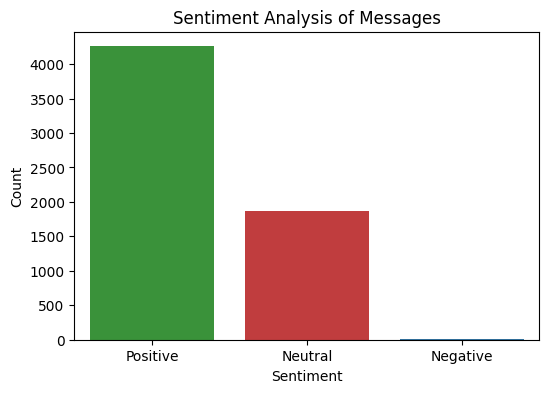


Sentiment Analysis DataFrame Head:
      Date     Time           Sender  \
0  9/17/23  2:08 PM           System   
1  9/17/23  2:20 PM  +91 96000 29515   
2  9/17/23  2:20 PM  +91 96000 29515   
3  9/17/23  2:21 PM  +91 63697 77039   
4  9/17/23  2:23 PM  +91 90429 04253   

                                             Message  \
0  Messages and calls are end-to-end encrypted. N...   
1                                                🙏🙏🙏   
2        Many more happy returns of the day Anil 💐💐💐   
3                            Happy Birthday Anil 🥳🎉🥰   
4                                      Thank you sir   

                                              scores  compound Sentiment  
0  {'neg': 0.084, 'neu': 0.916, 'pos': 0.0, 'comp...   -0.2960  Negative  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
2  {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...    0.6115  Positive  
3  {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...    0.5719  Positive  
4  {'neg': 

In [4]:
# --- Main Execution ---
df = parse_whatsapp_chat(file_path)

if not df.empty:
    print("Parsed DataFrame:")
    print(df.head())
    print("\nDataFrame Info:")
    print(df.info())

    # Sentiment Analysis
    pos, data_senti = sentimental_analysis(df)
    print("\nSentiment Analysis:")
    print(pos)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=pos.index, y=pos.values, palette=['#2ca02c', '#d62728', '#1f77b4'])
    plt.title('Sentiment Analysis of Messages')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    print("\nSentiment Analysis DataFrame Head:")
    print(data_senti.head())

In [8]:


    # Missed Call Analysis (assuming "Missed call" is still relevant)
    missed_call_placeholder = 'Missed call'
    print("\nChecking DataFrame before missed call analysis:")
    print(df.head())
    print(f"\nNumber of messages containing '{missed_call_placeholder}': {df['Message'].str.contains(missed_call_placeholder, na=False).sum()}")
    missed_calls = df[df['Message'].str.contains(missed_call_placeholder, na=False)]
    print(f"Type of missed_calls: {type(missed_calls)}") # Let's check this too
    print(type(missed_calls['Sender'])) # This is where you got the error

    missed_call_counts = missed_calls['Sender'].value_counts()

    print("\nMissed Call Analysis:")
    if not missed_call_counts.empty:
        print(missed_call_counts)
        plt.figure(figsize=(8, 5))
        missed_call_counts.plot(kind='bar', color='orange')
        plt.title('Missed Calls by Sender')
        plt.xlabel('Sender')
        plt.ylabel('Missed Call Count')
        plt.show()
    else:
        print("No missed calls found in the dataset.")



Checking DataFrame before missed call analysis:
      Date     Time           Sender  \
0  9/17/23  2:08 PM           System   
1  9/17/23  2:20 PM  +91 96000 29515   
2  9/17/23  2:20 PM  +91 96000 29515   
3  9/17/23  2:21 PM  +91 63697 77039   
4  9/17/23  2:23 PM  +91 90429 04253   

                                             Message  
0  Messages and calls are end-to-end encrypted. N...  
1                                                🙏🙏🙏  
2        Many more happy returns of the day Anil 💐💐💐  
3                            Happy Birthday Anil 🥳🎉🥰  
4                                      Thank you sir  

Number of messages containing 'Missed call': 0
Type of missed_calls: <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>

Missed Call Analysis:
No missed calls found in the dataset.



Flirty Message Detection:
Flirty
False    5935
True      213
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2916\358074623.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flirty_counts.index, y=flirty_counts.values, palette=['#1f77b4', '#d62728'])


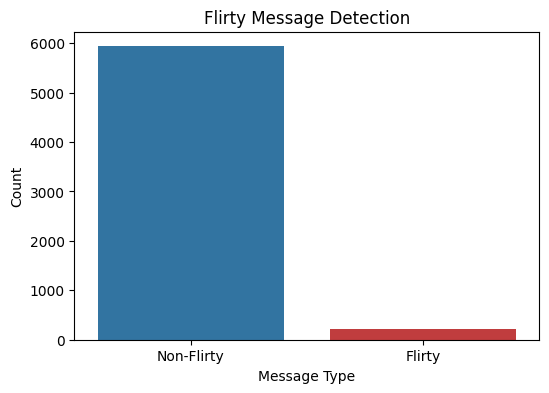


First 10 Flirty Messages:
                            Sender  \
52                  Alauddin Vcare   
128   Jahir Hussain Facility Vcare   
143                    Priya Vcare   
185             Mukundan_CEO Vcare   
199            Wasim Vcare Imports   
218             Mukundan_CEO Vcare   
224                +91 98405 56883   
227  Rizwan Sharieff Sir Bro Vcare   
259   Jahir Hussain Facility Vcare   
260   Richin VCare IT Asst Manager   

                                               Message  
52          Thanks to All to bundle of love and wishes  
128  Many more happy returns of the day dear Muthu....  
143                                           Dear All  
185  Dear all, Rotary club has associated with Byju...  
199                                          Dear All,  
218         congrats Gokul. May God bless the baby boy  
224      Congratulations Gokul sir. God bless the baby  
227  @918870676114 ✨ Warmest Congratulations on the...  
259  Many more happy returns of the day d

In [19]:
# Flirty Message Detection
df = detect_flirty_messages(df)
flirty_counts = df['Flirty'].value_counts()
print("\nFlirty Message Detection:")
print(flirty_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=flirty_counts.index, y=flirty_counts.values, palette=['#1f77b4', '#d62728'])
plt.xticks(ticks=[0, 1], labels=['Non-Flirty', 'Flirty'])
plt.title('Flirty Message Detection')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

flirty_messages = df[df['Flirty'] == True]
print("\nFirst 10 Flirty Messages:")
print(flirty_messages[['Sender', 'Message']].head(10))